Import the required dependences 

In [49]:
import  pandas as pd
import  numpy as np
import  matplotlib.pyplot as plt
import  seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing  import  MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder , LabelEncoder
from sklearn.model_selection import train_test_split


load the dataset

In [4]:
heart_data = pd.read_csv('heart_disease.csv')   

In [5]:
heart_data.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [ ]:
# info about the data
print(heart_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [ ]:
print(heart_data.shape) # number of row and columns

(10000, 21)


In [11]:
# checking for sum of missing values 
print(heart_data.isnull().sum())

Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64


In [12]:
# the lists of columns 
print(heart_data.columns)

Index(['Age', 'Gender', 'Blood Pressure', 'Cholesterol Level',
       'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'BMI',
       'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
       'Alcohol Consumption', 'Stress Level', 'Sleep Hours',
       'Sugar Consumption', 'Triglyceride Level', 'Fasting Blood Sugar',
       'CRP Level', 'Homocysteine Level', 'Heart Disease Status'],
      dtype='object')


In [15]:
# Statistical summary of the data
heart_data.describe()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,9971.000000,9981.000000,9970.000000,9978.000000,9975.000000,9974.000000,9978.000000,9974.000000,9980.000000
mean,49.296259,149.757740,225.425577,29.077269,6.991329,250.734409,120.142213,7.472201,12.456271
std,18.193970,17.572969,43.575809,6.307098,1.753195,87.067226,23.584011,4.340248,4.323426
min,18.000000,120.000000,150.000000,18.002837,4.000605,100.000000,80.000000,0.003647,5.000236
25%,34.000000,134.000000,187.000000,23.658075,5.449866,176.000000,99.000000,3.674126,8.723334
50%,49.000000,150.000000,226.000000,29.079492,7.003252,250.000000,120.000000,7.472164,12.409395
75%,65.000000,165.000000,263.000000,34.520015,8.531577,326.000000,141.000000,11.255592,16.140564
max,80.000000,180.000000,300.000000,39.996954,9.999952,400.000000,160.000000,14.997087,19.999037


In [13]:
# checking for missing values 
print(heart_data.isnull().sum())

Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64


In [ ]:
heart_data.value_counts('Heart Disease Status') # checking the balance of the target variable

Heart Disease Status
No     8000
Yes    2000
Name: count, dtype: int64

# Visualized to get some key inside of the data 

In [ ]:
# Convert columns with  yes/no categorical values to 1/0
binary_cols = [
    'Smoking', 'Family Heart Disease', 'Diabetes', 'High Blood Pressure',
    'Low HDL Cholesterol', 'High LDL Cholesterol', 'Heart Disease Status'
]

for col in binary_cols:
    heart_data[col] = heart_data[col].map({'Yes': 1, 'No': 0})


In [19]:
heart_data.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,1.0,1.0,0.0,24.991591,1.0,...,0.0,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,0
1,69.0,Female,146.0,286.0,High,0.0,1.0,1.0,25.221799,0.0,...,0.0,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,0
2,46.0,Male,126.0,216.0,Low,0.0,0.0,0.0,29.855447,0.0,...,1.0,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,0
3,32.0,Female,122.0,293.0,High,1.0,1.0,0.0,24.130477,1.0,...,1.0,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,0
4,60.0,Male,166.0,242.0,Low,1.0,1.0,1.0,20.486289,1.0,...,0.0,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,0


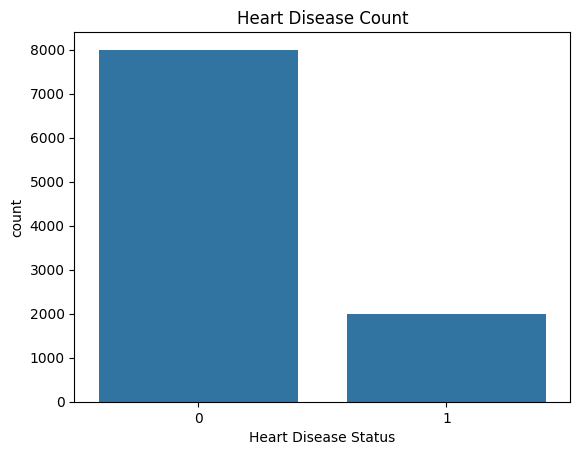

In [ ]:
#Check the Target Variable Balance We need to see how many people have Heart Disease Status = Yes vs No. Plot Bar chart (countplot)  If one class is much smaller than the other, the model may become biased.
sns.countplot(x='Heart Disease Status', data=heart_data)
plt.title("Heart Disease Count")
plt.show()

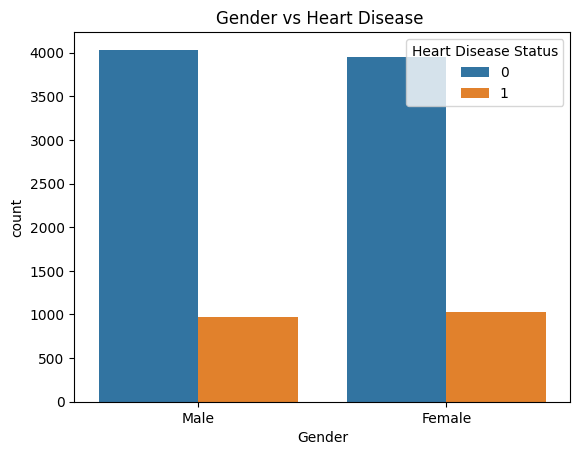

In [22]:
#Look at Gender vs Heart Disease  Heart disease often varies by gender. Plot: Bar chart (Gender on x-axis, count of Heart Disease) Why: To see if disease frequency differs across gender.
sns.countplot(x='Gender', hue='Heart Disease Status', data=heart_data)
plt.title('Gender vs Heart Disease ')
plt.show()

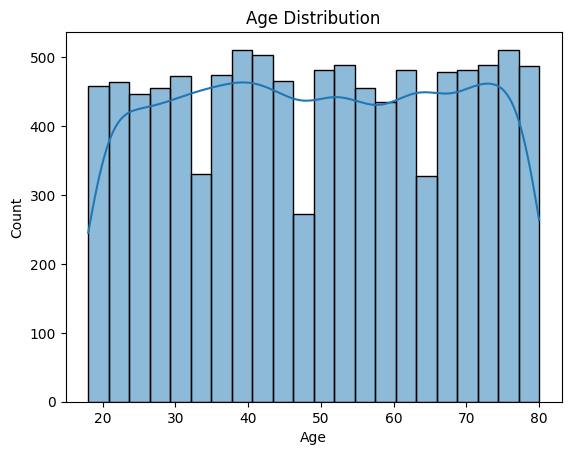

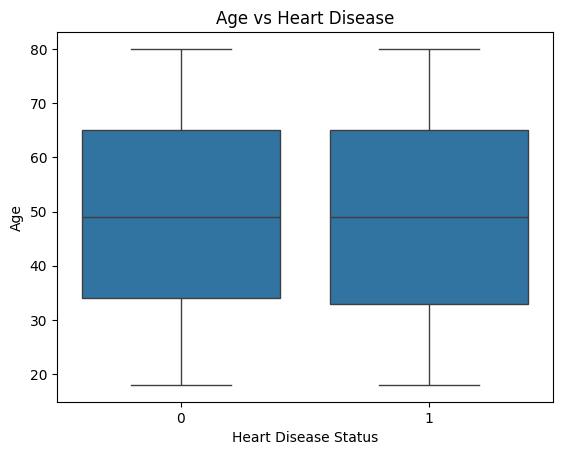

In [23]:
#age Distribution and its relation to Heart Disease
# Histogram
sns.histplot(heart_data['Age'], kde=True)
plt.title("Age Distribution")
plt.show()

# Boxplot Age vs Target
sns.boxplot(x='Heart Disease Status', y='Age', data=heart_data )
plt.title("Age vs Heart Disease")
plt.show()

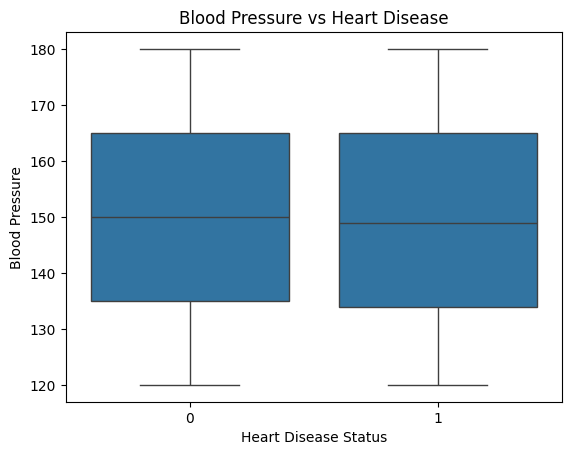

In [ ]:
# Boxplot Blood Pressure vs Target
sns.boxplot(x='Heart Disease Status', y='Blood Pressure', data=heart_data )
plt.title("Blood Pressure vs Heart Disease")
plt.show()

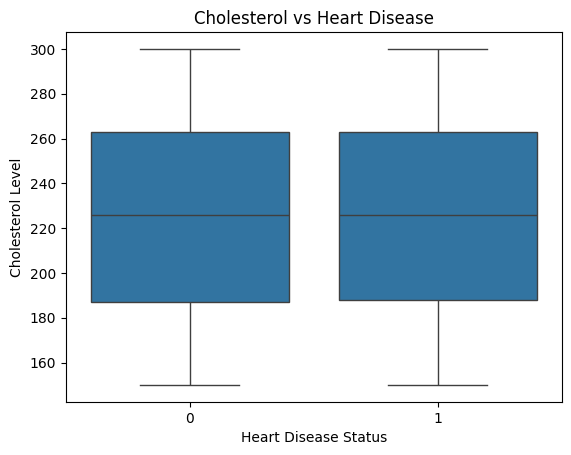

In [27]:
# Boxplot Cholesterol vs Target
sns.boxplot(x='Heart Disease Status', y='Cholesterol Level', data=heart_data )
plt.title("Cholesterol vs Heart Disease")
plt.show()

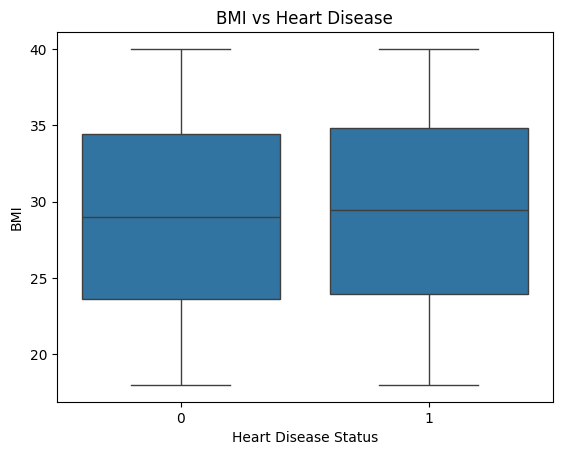

In [ ]:
# Boxplot BMI vs Target
sns.boxplot(x='Heart Disease Status', y='BMI', data=heart_data )
plt.title("BMI vs Heart Disease")
plt.show()

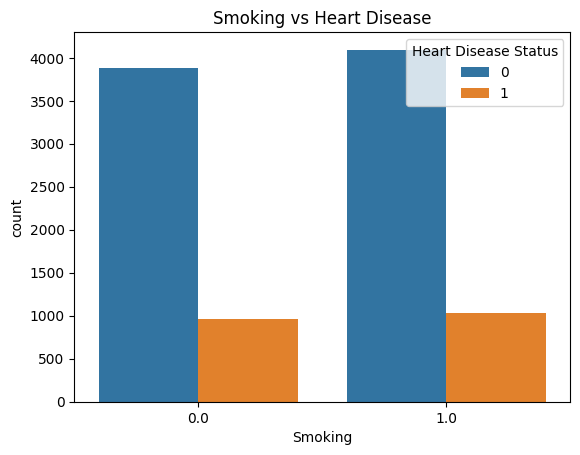

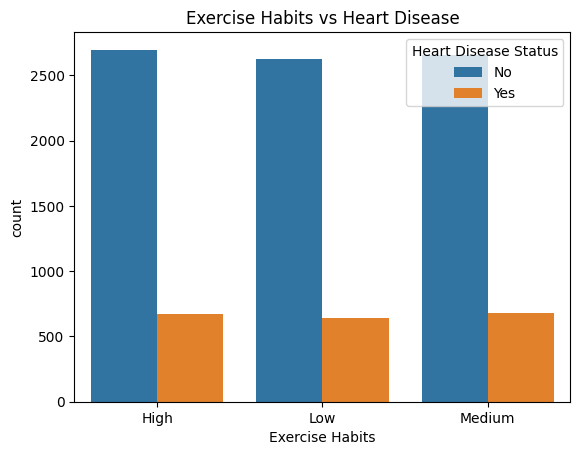

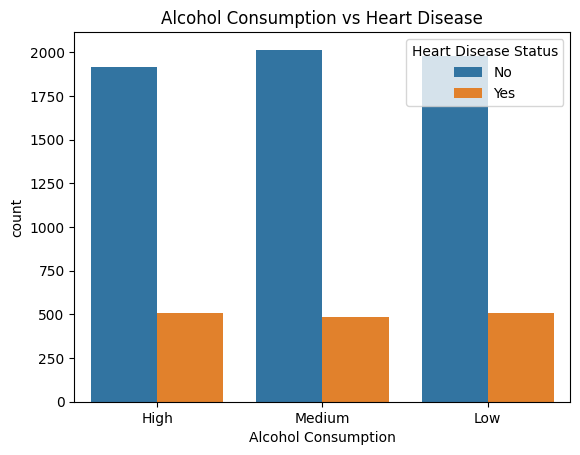

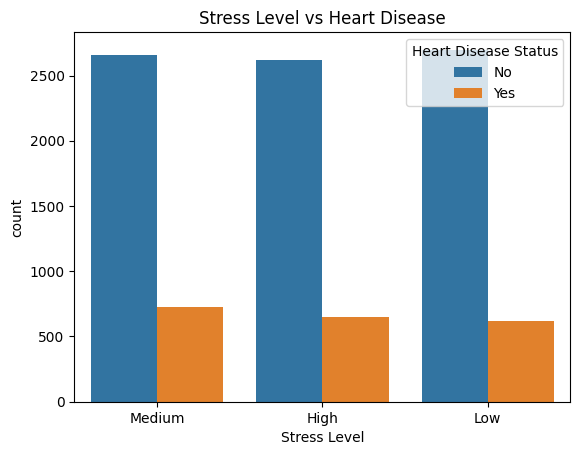

In [ ]:
# Boxplots for other continuous features vs Target
sns.countplot(x='Smoking', hue='Heart Disease Status', data=heart_data)
plt.title("Smoking vs Heart Disease")
plt.show()

sns.countplot(x='Exercise Habits', hue='Heart Disease Status', data=df)
plt.title("Exercise Habits vs Heart Disease")
plt.show()

sns.countplot(x='Alcohol Consumption', hue='Heart Disease Status', data=df)
plt.title("Alcohol Consumption vs Heart Disease")
plt.show()

sns.countplot(x='Stress Level', hue='Heart Disease Status', data=df)
plt.title("Stress Level vs Heart Disease")
plt.show()

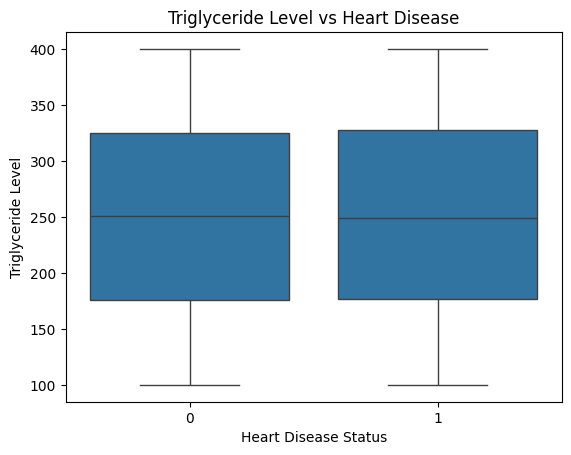

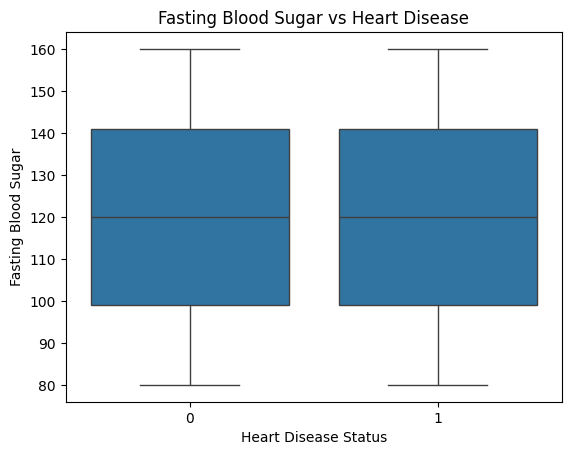

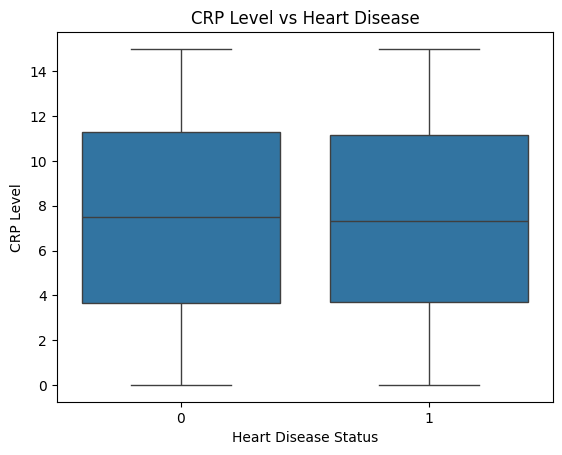

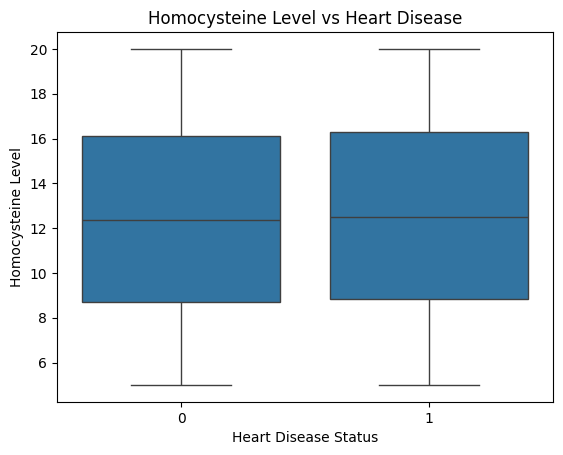

In [ ]:
# boxplots for other continuous features vs Target
features = ['Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level', 'Homocysteine Level']

for col in features:
    sns.boxplot(x='Heart Disease Status', y=col, data=heart_data)
    plt.title(f"{col} vs Heart Disease")
    plt.show()

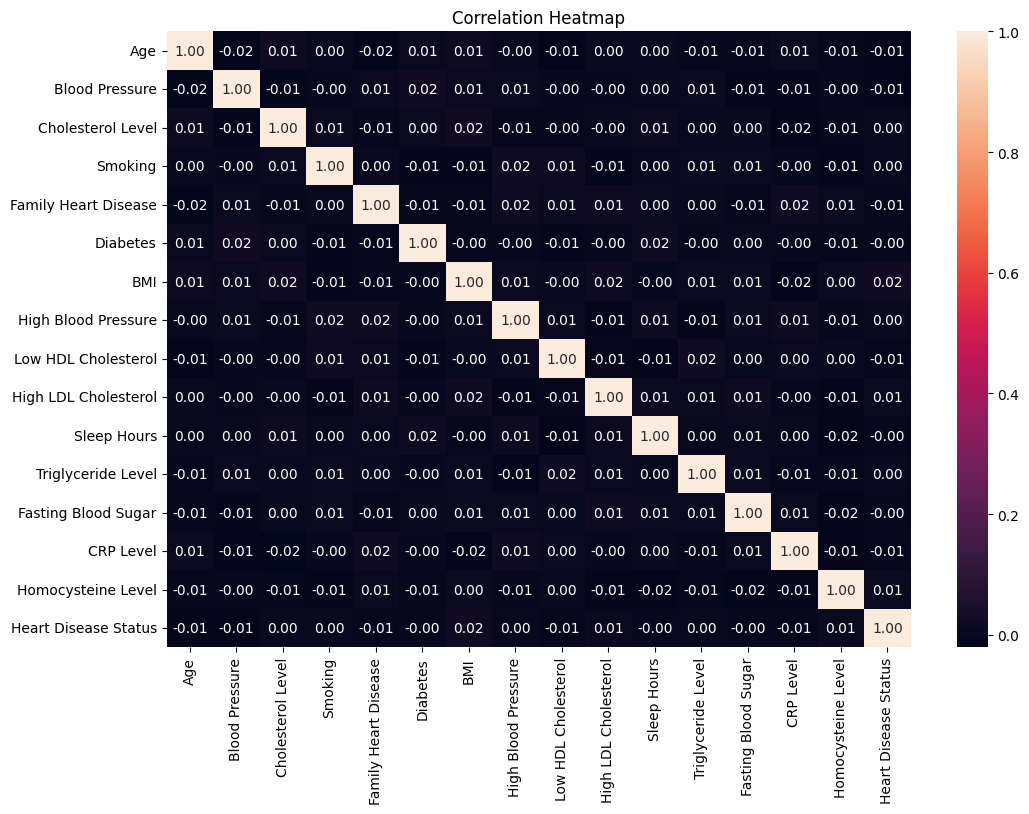

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(heart_data.corr(numeric_only=True), annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Data Preprocessing 

we encode other categorical columns Gender, Exercise Habits, Alcohol Consumption, Stress Level and Sugar Consumption to make our dataset fully numeric we use mapping becouse this columns have ranking that why we map them like this 

In [32]:
heart_data['Gender'] = heart_data['Gender'].map({'Male': 1, 'Female': 0})
heart_data['Exercise Habits'] = heart_data['Exercise Habits'].map({'Low': 0, 'Medium': 1, 'High': 2})
heart_data['Alcohol Consumption'] = heart_data['Alcohol Consumption'].map({'Low': 0, 'Medium': 1, 'High': 2})
heart_data['Stress Level'] = heart_data['Stress Level'].map({'Low': 0, 'Medium': 1, 'High': 2})
heart_data['Sugar Consumption'] = heart_data['Sugar Consumption'].map({'Low': 0, 'Medium': 1, 'High': 2})

In [33]:
heart_data.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,1.0,153.0,155.0,2.0,1.0,1.0,0.0,24.991591,1.0,...,0.0,2.0,1.0,7.633228,1.0,342.0,NaN,12.969246,12.387250,0
1,69.0,0.0,146.0,286.0,2.0,0.0,1.0,1.0,25.221799,0.0,...,0.0,1.0,2.0,8.744034,1.0,133.0,157.0,9.355389,19.298875,0
2,46.0,1.0,126.0,216.0,0.0,0.0,0.0,0.0,29.855447,0.0,...,1.0,0.0,0.0,4.440440,0.0,393.0,92.0,12.709873,11.230926,0
3,32.0,0.0,122.0,293.0,2.0,1.0,1.0,0.0,24.130477,1.0,...,1.0,0.0,2.0,5.249405,2.0,293.0,94.0,12.509046,5.961958,0
4,60.0,1.0,166.0,242.0,0.0,1.0,1.0,1.0,20.486289,1.0,...,0.0,0.0,2.0,7.030971,2.0,263.0,154.0,10.381259,8.153887,0


In [34]:
heart_data.tail()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
9995,25.0,0.0,136.0,243.0,1.0,1.0,0.0,0.0,18.788791,1.0,...,1.0,1.0,2.0,6.834954,1.0,343.0,133.0,3.588814,19.132004,1
9996,38.0,1.0,172.0,154.0,1.0,0.0,0.0,0.0,31.856801,1.0,...,1.0,NaN,2.0,8.247784,0.0,377.0,83.0,2.658267,9.715709,1
9997,73.0,1.0,152.0,201.0,2.0,1.0,0.0,1.0,26.899911,0.0,...,1.0,NaN,0.0,4.436762,0.0,248.0,88.0,4.408867,9.492429,1
9998,23.0,1.0,142.0,299.0,0.0,1.0,0.0,1.0,34.964026,1.0,...,1.0,1.0,2.0,8.526329,1.0,113.0,153.0,7.215634,11.873486,1
9999,38.0,0.0,128.0,193.0,1.0,1.0,1.0,1.0,25.111295,0.0,...,1.0,2.0,1.0,5.659394,2.0,121.0,149.0,14.387810,6.208531,1


Now our dataset is fully numeric 

Handling  outliers  

In [44]:
heart_data.mean()

Age                      49.296259
Gender                    0.501252
Blood Pressure          149.757740
Cholesterol Level       225.425577
Exercise Habits           1.010125
Smoking                   0.513584
Family Heart Disease      0.498547
Diabetes                  0.496690
BMI                      29.077269
High Blood Pressure       0.503509
Low HDL Cholesterol       0.501253
High LDL Cholesterol      0.495087
Alcohol Consumption       0.991637
Stress Level              0.995089
Sleep Hours               6.991329
Sugar Consumption         0.993982
Triglyceride Level      250.734409
Fasting Blood Sugar     120.142213
CRP Level                 7.472201
Homocysteine Level       12.456271
Heart Disease Status      0.200000
dtype: float64

In [41]:
# Detecting outliers using IQR method
def detect_outliers_iqr(df):
    outlier_summary = {}
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower) | (df[col] > upper)]
        outlier_summary[col] = len(outliers)
    return pd.Series(outlier_summary).sort_values(ascending=False)

outlier_counts = detect_outliers_iqr(heart_data)
print(outlier_counts)

Heart Disease Status    2000
High LDL Cholesterol       0
Homocysteine Level         0
CRP Level                  0
Fasting Blood Sugar        0
Triglyceride Level         0
Sugar Consumption          0
Sleep Hours                0
Stress Level               0
Alcohol Consumption        0
Age                        0
Gender                     0
High Blood Pressure        0
BMI                        0
Diabetes                   0
Family Heart Disease       0
Smoking                    0
Exercise Habits            0
Cholesterol Level          0
Blood Pressure             0
Low HDL Cholesterol        0
dtype: int64


Every numeric column except Heart disaese status has no detected outliers based on the IQR rule   no outliers

Handling missing values 

In [35]:
# find missing values
heart_data.isnull().sum()

Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64

In [36]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   float64
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   float64
 5   Smoking               9975 non-null   float64
 6   Family Heart Disease  9979 non-null   float64
 7   Diabetes              9970 non-null   float64
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   float64
 10  Low HDL Cholesterol   9975 non-null   float64
 11  High LDL Cholesterol  9974 non-null   float64
 12  Alcohol Consumption   7414 non-null   float64
 13  Stress Level          9978 non-null   float64
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

Handling Missing Values (Feature Columns Only)
Before filling missing values, we excluded the target column (Heart Disease Status) to prevent accidental modification. Then  we filled missing values in the feature columns using their mean values, since no outliers were detected.

Explanation
Step 1: drop(columns=['Heart Disease Status'])
Temporarily removes the target column so only the independent features are processed.
Step 2: fillna(features.mean())
Replaces any missing values (NaN) in numeric columns with the mean of each column.
Step 3: heart_data.update(features)
Updates the original dataset with the cleaned (filled) feature values, while keeping the target column untouched.

Result
All missing values in the feature columns are replaced with their mean values, and the target column (Heart Disease Status) remains unchanged ready to be used later as the label (y) during model training

In [45]:
features = heart_data.drop(columns=['Heart Disease Status'])
features.fillna(features.mean(), inplace=True)
heart_data.update(features)

In [ ]:
# check again for missing values
heart_data.isnull().sum()

Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Exercise Habits         0
Smoking                 0
Family Heart Disease    0
Diabetes                0
BMI                     0
High Blood Pressure     0
Low HDL Cholesterol     0
High LDL Cholesterol    0
Alcohol Consumption     0
Stress Level            0
Sleep Hours             0
Sugar Consumption       0
Triglyceride Level      0
Fasting Blood Sugar     0
CRP Level               0
Homocysteine Level      0
Heart Disease Status    0
dtype: int64

No missing value found now everything fixed 

Handling Duplicate

In [ ]:
# Return False indicating no duplicates
heart_data.duplicated().any()

False

In [ ]:
# Count of duplicate rows 
heart_data.duplicated().sum()


0

In [ ]:
# Display duplicate rows if any
heart_data[heart_data.duplicated()]

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status


No duplicate found 

we separate features and target and label them  x and y

In [47]:
x = heart_data.drop(columns=['Heart Disease Status'])
y = heart_data['Heart Disease Status']

we then split the data into training and testing data set x_train,y_train,x_test,y_test

In [52]:
x.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
0,56.0,1.0,153.0,155.0,2.0,1.0,1.0,0.0,24.991591,1.0,1.0,0.0,2.0,1.0,7.633228,1.0,342.0,120.142213,12.969246,12.387250
1,69.0,0.0,146.0,286.0,2.0,0.0,1.0,1.0,25.221799,0.0,1.0,0.0,1.0,2.0,8.744034,1.0,133.0,157.000000,9.355389,19.298875
2,46.0,1.0,126.0,216.0,0.0,0.0,0.0,0.0,29.855447,0.0,1.0,1.0,0.0,0.0,4.440440,0.0,393.0,92.000000,12.709873,11.230926
3,32.0,0.0,122.0,293.0,2.0,1.0,1.0,0.0,24.130477,1.0,0.0,1.0,0.0,2.0,5.249405,2.0,293.0,94.000000,12.509046,5.961958
4,60.0,1.0,166.0,242.0,0.0,1.0,1.0,1.0,20.486289,1.0,0.0,0.0,0.0,2.0,7.030971,2.0,263.0,154.000000,10.381259,8.153887


In [53]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Heart Disease Status, dtype: int64

In [50]:

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, stratify=y,random_state=42)

we then apply standardization Scaling 

In [72]:
scaler = StandardScaler()
# fit the scaler on training data only 
x_train_scaled = scaler.fit_transform(x_train)

In [80]:
# apply the same transformation to test data
x_test_scaled = scaler.fit_transform(x_test)

we train model 


In [86]:
model = LogisticRegression(max_iter=5000)
model.fit(x_train_scaled,y_train)

LogisticRegression(max_iter=5000)

we then make prediction 

In [87]:
y_pred = model.predict(x_test_scaled)

Model evaluation matrix accuracy score, confussion matrix, classification report

In [91]:
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy score: {accuracy * 100:.2f}%")

Accuracy score: 80.00%


confusion matrix

In [94]:
print(confusion_matrix(y_test,y_pred))

[[1600    0]
 [ 400    0]]


In [96]:
# classifiction report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1600
           1       0.00      0.00      0.00       400

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000



C:\Users\HP ProBook 440 G7\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP ProBook 440 G7\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP ProBook 440 G7\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [99]:
from sklearn.utils import resample

# Combine X and y
data = pd.concat([X, y], axis=1)

# Separate majority and minority classes
majority = data[data['Heart Disease Status'] == 0]
minority = data[data['Heart Disease Status'] == 1]

# Upsample minority class
minority_upsampled = resample(minority, 
                              replace=True,     # sample with replacement
                              n_samples=len(majority), # match majority count
                              random_state=42)

# Combine back
balanced_data = pd.concat([majority, minority_upsampled])

# Split again
X_balanced = balanced_data.drop('Heart Disease Status', axis=1)
y_balanced = balanced_data['Heart Disease Status']

In [100]:
model = LogisticRegression(class_weight='balanced', max_iter=1000)


In [101]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [102]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1599    1]
 [ 400    0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1600
           1       0.00      0.00      0.00       400

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000



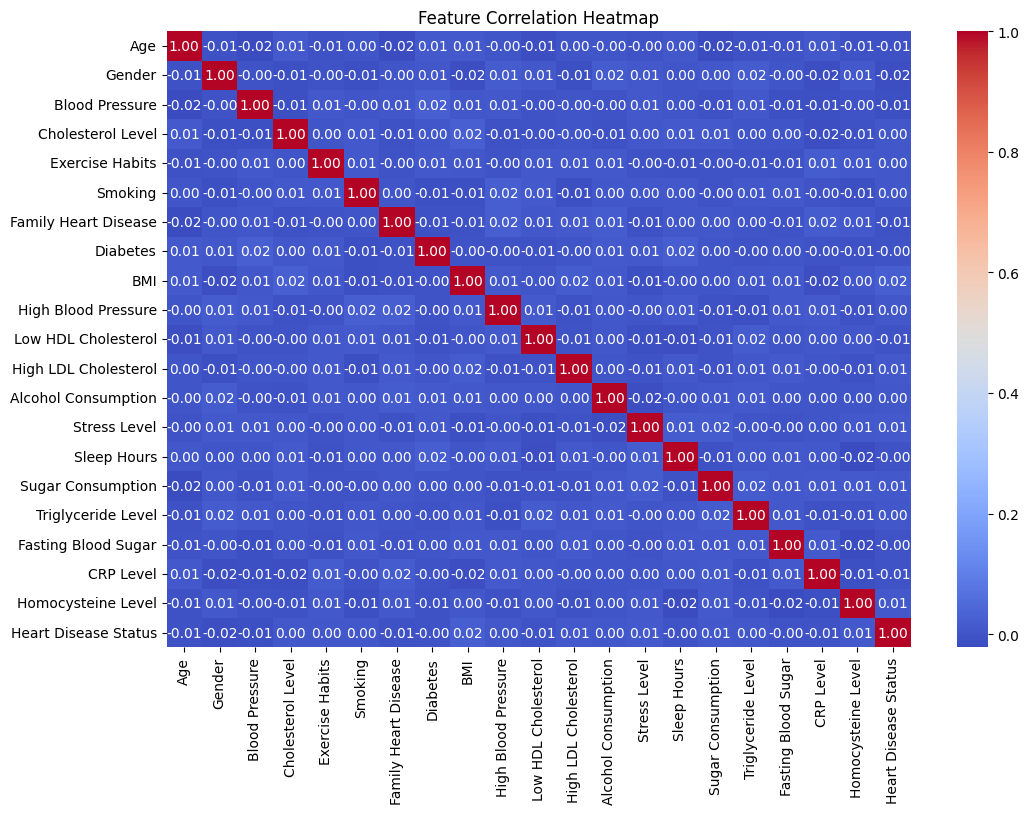

Heart Disease Status    1.000000
BMI                     0.019682
Stress Level            0.011334
Homocysteine Level      0.008296
Sugar Consumption       0.008229
High LDL Cholesterol    0.007914
Alcohol Consumption     0.004839
Exercise Habits         0.002994
Triglyceride Level      0.002914
Cholesterol Level       0.002706
Smoking                 0.002461
High Blood Pressure     0.002253
Fasting Blood Sugar    -0.002244
Diabetes               -0.002704
Sleep Hours            -0.003816
Low HDL Cholesterol    -0.005508
CRP Level              -0.006009
Family Heart Disease   -0.006809
Age                    -0.009239
Blood Pressure         -0.013877
Gender                 -0.016518
Name: Heart Disease Status, dtype: float64


In [93]:

# Compute correlation matrix
corr = heart_data.corr()

# Visualize as heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Sort correlation with target variable
target_corr = corr['Heart Disease Status'].sort_values(ascending=False)
print(target_corr)

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

X = heart_data.drop(columns=['Heart Disease Status'])
y = heart_data['Heart Disease Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

model = RandomForestClassifier(random_state=2)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))

# Show feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importance:\n", feature_importance)

Random Forest Accuracy: 0.8

Feature Importance:
 BMI                     0.099645
Homocysteine Level      0.095098
CRP Level               0.094705
Sleep Hours             0.094443
Triglyceride Level      0.090290
Cholesterol Level       0.085798
Fasting Blood Sugar     0.081352
Age                     0.080965
Blood Pressure          0.078761
Alcohol Consumption     0.029956
Sugar Consumption       0.025440
Exercise Habits         0.023808
Stress Level            0.021945
Diabetes                0.014723
Smoking                 0.014633
Family Heart Disease    0.014168
High LDL Cholesterol    0.014103
Low HDL Cholesterol     0.014087
High Blood Pressure     0.013487
Gender                  0.012592
dtype: float64
